<div style="text-align: center; background-color: #559cff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Lab 02 - Introduction To Data Science @ FIT-HCMUS, VNU-HCM 📌
</div>

<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 02 - Preprocessing
</div>

## Import

In [1]:
import os
import sys
import json
import ast

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

## Exploring data

### Combine raw data into dataframes for both video and comment sections

In [2]:
raw_data_path = '../data/raw/'

with open('../data/external/channel_id_Phuc.json', 'r') as file:
    channel_id_phuc = json.load(file)

with open('../data/external/channel_id_nam.json', 'r') as file:
    channel_id_nam = json.load(file)

list_df_videos = []
list_df_comments = []

for channel, id in channel_id_phuc.items():
    list_df_videos.append(pd.read_csv(raw_data_path + channel + '_videos.csv'))
    list_df_comments.append(pd.read_csv(raw_data_path + channel + '_comments.csv', lineterminator = '\n'))

for channel, id in channel_id_nam.items():
    list_df_videos.append(pd.read_csv(raw_data_path + channel + '_videos.csv'))
    list_df_comments.append(pd.read_csv(raw_data_path + channel + '_comments.csv', lineterminator = '\n'))

    
df_videos = pd.concat(list_df_videos, ignore_index = True)
df_comments = pd.concat(list_df_comments, ignore_index = True)

In [3]:
df_videos.head()

,video_id,title,published,view_count,like_count,comment_count,duration,definition,tags,default_audio_language,madeforkid,channel_id,channelTitle
0,hh6gE0LxfO8,"#5 Machine Learning Specialization [Course 1, ...",2022-12-01T13:21:30Z,30742,319.0,6.0,PT7M17S,hd,NaN,en,False,UCcIXc5mJsHVYTZR1maL5l9w,DeepLearningAI
1,_i3aqgKVNQI,C5W3L01 Basic Models,2018-02-05T19:50:14Z,110835,436.0,12.0,PT6M19S,hd,NaN,en,False,UCcIXc5mJsHVYTZR1maL5l9w,DeepLearningAI
2,uvTL1N02f04,"#23 Machine Learning Specialization [Course 1,...",2022-12-01T13:22:38Z,11639,107.0,4.0,PT6M53S,hd,NaN,en,False,UCcIXc5mJsHVYTZR1maL5l9w,DeepLearningAI
3,H4YK_7MAckk,ChatGPT Prompt Engineering for Developers: A s...,2023-04-27T14:49:09Z,143057,2847.0,121.0,PT1M58S,hd,"['ChatGPT', 'prompt engineering', 'openai', 'd...",en,False,UCcIXc5mJsHVYTZR1maL5l9w,DeepLearningAI
4,YVtP5UGdgXg,"#25 Machine Learning Specialization [Course 1,...",2022-12-01T13:22:45Z,11542,106.0,1.0,PT6M35S,hd,NaN,en,False,UCcIXc5mJsHVYTZR1maL5l9w,DeepLearningAI


In [4]:
df_comments.head()

,Comment_id,author,Reply_for,Type,video_id,total_reply,like_count,published_at,textdisplay,updatedat
0,Ugw5fySq5NxfwgCuFhB4AaABAg,@AiexpertRajivVerma,NaN,1.0,H_8ZVRRtiIA,0.0,0.0,2023-12-11T01:11:19Z,Sir thank you love love 💕❤️❤❤️❤❤❤❤❤❤ you for f...,2023-12-11T01:11:19Z
1,Ugw_73FC0tI1B6PW9nh4AaABAg,@hamasali8764,NaN,1.0,bZwkaVnhEo4,0.0,0.0,2023-07-27T16:54:52Z,Best One🎉,2023-07-27T16:54:52Z
2,Ugx1qnyHmXF9-BjhIWR4AaABAg,@R0H00,NaN,1.0,hkOosfWxBK4,0.0,1.0,2023-11-18T02:51:01Z,"Hi, I&#39;m a clinician who is working in the ...",2023-11-18T02:51:01Z
3,UgyNZvEu-Ht9ZlLwOXp4AaABAg,@nitinsnoisepollution6293,NaN,1.0,hkOosfWxBK4,0.0,0.0,2023-11-17T20:39:13Z,Superb 🎉❤,2023-11-17T20:39:13Z
4,UgzAxiiLaxyBHEcRw0R4AaABAg,@REDBONDYT,NaN,1.0,Fxq6vjJwX3o,0.0,1.0,2023-07-30T12:36:13Z,Very informative 😃😺,2023-07-30T12:36:13Z


#### Overview

In [5]:
df_videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5879 entries, 0 to 5878
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                5879 non-null   object 
 1   title                   5879 non-null   object 
 2   published               5879 non-null   object 
 3   view_count              5879 non-null   int64  
 4   like_count              5829 non-null   float64
 5   comment_count           5873 non-null   float64
 6   duration                5879 non-null   object 
 7   definition              5879 non-null   object 
 8   tags                    5064 non-null   object 
 9   default_audio_language  5498 non-null   object 
 10  madeforkid              5879 non-null   bool   
 11  channel_id              5879 non-null   object 
 12  channelTitle            5879 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(9)
memory usage: 557.0+ KB


In [6]:
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177643 entries, 0 to 177642
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Comment_id    177643 non-null  object 
 1   author        177640 non-null  object 
 2   Reply_for     41750 non-null   object 
 3   Type          177643 non-null  float64
 4   video_id      177643 non-null  object 
 5   total_reply   177643 non-null  float64
 6   like_count    177643 non-null  float64
 7   published_at  177643 non-null  object 
 8   textdisplay   177643 non-null  object 
 9   updatedat     177643 non-null  object 
dtypes: float64(3), object(7)
memory usage: 13.6+ MB


### The size of the datasets

#### Videos section

In [7]:
print('Rows:', df_videos.shape[0])
print('Columns:', df_videos.shape[1])

Rows: 5879
Columns: 13


#### Comments section

In [8]:
print('Rows:', df_comments.shape[0])
print('Columns:', df_comments.shape[1])

Rows: 177643
Columns: 10


### The meaning of each column

**Videos dataset**
- `video_id`: Video ID.
- `title`: Video title.
- `published`: Publication date of the video.
- `view_count`: The video's view count.
- `like_count`: The video's like count.
- `comment_count`: The video's comment count.
- `duration`: How long the video is.
- `definition`: How much information is captured and reproduced (eg. hd, sd).
- `tags`: Tags of the video.
- `default_audio_language`: Default audio language of the video.
- `madeforkid`: Mark if this video is made for kids or not.
- `playlist_title`: Playlist title.
- `channel_id`: The channel ID.
- `channelTitle`: The channel title.

**Comments dataset**
- `Comment_id`: Comment ID.
- `author`: Author of the comment.
- `Reply_for`: The parent comment ID that this comment replied to.
- `Type`: Type of comment (top-level comment (1) or reply(2)).
- `video_id`: The video ID.
- `total_reply`: Total responses to this comment.
- `like_count`: The comment's like count.
- `published_at`: Publication date of the comment.
- `textdisplay`: The content of the comment.
- `updatedat`: The comment's updated date.

### Duplicated rows

#### Videos section

How many duplicated rows do the `df_videos` have?

In [9]:
df_videos.duplicated().sum()

378

In [10]:
df_videos[df_videos.duplicated(keep = False)]

,video_id,title,published,view_count,like_count,comment_count,duration,definition,tags,default_audio_language,madeforkid,channel_id,channelTitle
15,p-ltr1C7u2o,"#31 Machine Learning Specialization [Course 1,...",2022-12-01T13:23:03Z,12647,110.0,0.0,PT9M48S,hd,NaN,en,False,UCcIXc5mJsHVYTZR1maL5l9w,DeepLearningAI
22,YjpCQof9tI8,"#24 Machine Learning Specialization [Course 1,...",2022-12-01T13:22:41Z,12923,105.0,4.0,PT7M46S,hd,NaN,en,False,UCcIXc5mJsHVYTZR1maL5l9w,DeepLearningAI
23,gG_wI_uGfIE,"#6 Machine Learning Specialization [Course 1, ...",2022-12-01T13:21:34Z,26485,341.0,11.0,PT8M54S,hd,NaN,en,False,UCcIXc5mJsHVYTZR1maL5l9w,DeepLearningAI
24,RGL_XUjPkGo,"#19 Machine Learning Specialization [Course 1,...",2022-12-01T13:22:25Z,13778,127.0,1.0,PT6M37S,hd,NaN,en,False,UCcIXc5mJsHVYTZR1maL5l9w,DeepLearningAI
25,PKm61nrqpCA,"#17 Machine Learning Specialization [Course 1,...",2022-12-01T13:22:17Z,14147,130.0,4.0,PT7M2S,hd,NaN,en,False,UCcIXc5mJsHVYTZR1maL5l9w,DeepLearningAI
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5282,LfdK-v0SbGI,GPUs: Explained,2019-03-20T19:15:25Z,248980,6047.0,203.0,PT7M29S,hd,"['gpu', 'cpu', 'graphic processing unit', 'cor...",en-US,False,UCKWaEZ-_VweaEx1j62do_vQ,IBM Technology
5310,lt4OsgmUTGI,What is Quantum Computing?,2022-05-27T14:41:08Z,122131,3012.0,108.0,PT7M1S,hd,NaN,en-US,False,UCKWaEZ-_VweaEx1j62do_vQ,IBM Technology
5321,6S1etS5cLYI,What is Robotic Process Automation (RPA)?,2022-08-17T13:01:09Z,36523,959.0,22.0,PT7M19S,hd,"['IBM', 'IBM Cloud', 'RPA', 'Robotic Process A...",en-US,False,UCKWaEZ-_VweaEx1j62do_vQ,IBM Technology
5334,lt4OsgmUTGI,What is Quantum Computing?,2022-05-27T14:41:08Z,122131,3012.0,108.0,PT7M1S,hd,NaN,en-US,False,UCKWaEZ-_VweaEx1j62do_vQ,IBM Technology


#### Comments section

How many duplicated rows do the `df_comments` have?

In [11]:
df_comments.duplicated().sum()

33731

In [12]:
df_comments[df_comments.duplicated(keep = False)]

,Comment_id,author,Reply_for,Type,video_id,total_reply,like_count,published_at,textdisplay,updatedat
4233,UgxFhnV-GMjQooTuN_x4AaABAg,@tristandevignemont1291,NaN,1.0,QCX62YJCmGk,0.0,0.0,2023-12-21T22:48:29Z,Math became magic,2023-12-21T22:48:29Z
4234,UgyypszzOn4EYj4f32Z4AaABAg,@unveil7762,NaN,1.0,QCX62YJCmGk,0.0,0.0,2023-12-21T17:26:39Z,GLSL Time…. I will watch the end of the video ...,2023-12-21T17:27:48Z
4235,UgxcQbUsvUC9EJ4kJx94AaABAg,@aabnamak,NaN,1.0,QCX62YJCmGk,0.0,0.0,2023-12-21T06:22:41Z,I wonder what would happen if we had a longer ...,2023-12-21T06:22:41Z
4236,Ugw1Cn0ITqQB6MSXKMd4AaABAg,@geo17139,NaN,1.0,QCX62YJCmGk,0.0,0.0,2023-12-20T19:28:45Z,This is the same thing with a video with some ...,2023-12-20T19:28:45Z
4237,UgxSc42BmaQ54IJ1uF54AaABAg,@sidereon9793,NaN,1.0,QCX62YJCmGk,0.0,0.0,2023-12-19T05:25:27Z,"(me, having taken exactly one Astronomy class ...",2023-12-19T05:25:27Z
...,...,...,...,...,...,...,...,...,...,...
177338,Ugw-_fBO6HYoM29IeGh4AaABAg.9nixxnEsZpE9nofFBsqhGb,@DavidEggertsen,Ugw-_fBO6HYoM29IeGh4AaABAg,2.0,FvXLxO-fhhc,0.0,0.0,2023-03-28T20:38:00Z,"Yeah, definitely prefer the old format. It was...",2023-03-28T20:38:00Z
177339,UgxdKmTw2ENglRz-fWd4AaABAg,@lancethrustworthy,NaN,1.0,FvXLxO-fhhc,0.0,0.0,2023-03-26T15:06:38Z,Why are you doing the synthetic narrator stuff...,2023-03-26T15:10:47Z
177340,UgzMOMuxAGXh4UVXvOt4AaABAg,@dipanjanmandal1771,NaN,1.0,FvXLxO-fhhc,1.0,5.0,2023-03-26T14:09:00Z,I know this channel must help me<br>because I ...,2023-03-26T14:09:00Z
177341,UgzMOMuxAGXh4UVXvOt4AaABAg.9nip8GHbN6c9nsdf8XFnhJ,@PROROBOTS,UgzMOMuxAGXh4UVXvOt4AaABAg,2.0,FvXLxO-fhhc,0.0,0.0,2023-03-30T09:41:10Z,"Thank you, share the video",2023-03-30T09:41:10Z


#### Drop duplicate rows

In [13]:
df_videos = df_videos.drop_duplicates()
df_comments = df_comments.drop_duplicates()

### Current column types in datasets

#### Videos section

In [14]:
df_videos.dtypes

video_id                   object
title                      object
published                  object
view_count                  int64
like_count                float64
comment_count             float64
duration                   object
definition                 object
tags                       object
default_audio_language     object
madeforkid                   bool
channel_id                 object
channelTitle               object
dtype: object

The following fields need to be converted to the specified data types:
- `published` to datetime.
- `duration` to timedelta.
- `tags` to a list of strings.

In [15]:
df_videos['published'] =  df_videos['published'].apply(pd.to_datetime)
df_videos['duration'] = df_videos['duration'].apply(pd.to_timedelta)
df_videos['tags'] = df_videos['tags'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else np.nan)

#### Comments section

In [16]:
df_comments.dtypes

Comment_id       object
author           object
Reply_for        object
Type            float64
video_id         object
total_reply     float64
like_count      float64
published_at     object
textdisplay      object
updatedat        object
dtype: object

The `published_at` and `updatedat` fields need to be converted to datetime.

In [17]:
df_comments['published_at'] =  df_comments['published_at'].apply(pd.to_datetime)
df_comments['updatedat'] =  df_comments['updatedat'].apply(pd.to_datetime)

Next, we will drop columns that are unnecessary for subsequent steps.

In [18]:
df_videos = df_videos.drop(columns = ['channel_id'])
df_comments = df_comments.drop(columns = ['Comment_id'])
df_comments = df_comments.drop(columns = ['Reply_for'])

### Distribution of Values for Numeric Columns

In [19]:
def num_missing_ratio(column):
    return (column.isnull().sum() / len(column) * 100).round(1)

def num_lower_quartile(column):
    return column.quantile(0.25)

def num_median(column):
    return column.quantile(0.5)

def num_upper_quartile(column):
    return column.quantile(0.75)

num_types = ['int64', 'float64']

In [20]:
num_col_info_df_videos = df_videos.select_dtypes(include = num_types)

num_col_info_df_videos = num_col_info_df_videos.agg([num_missing_ratio, 'min', num_lower_quartile, num_median, num_upper_quartile, 'max'])
num_col_info_df_videos

,view_count,like_count,comment_count
num_missing_ratio,0.0,0.7,0.1
min,0.0,0.0,0.0
num_lower_quartile,4078.0,78.0,4.0
num_median,22773.0,495.0,32.0
num_upper_quartile,99636.0,2345.0,139.0
max,19622082.0,1043942.0,26833.0


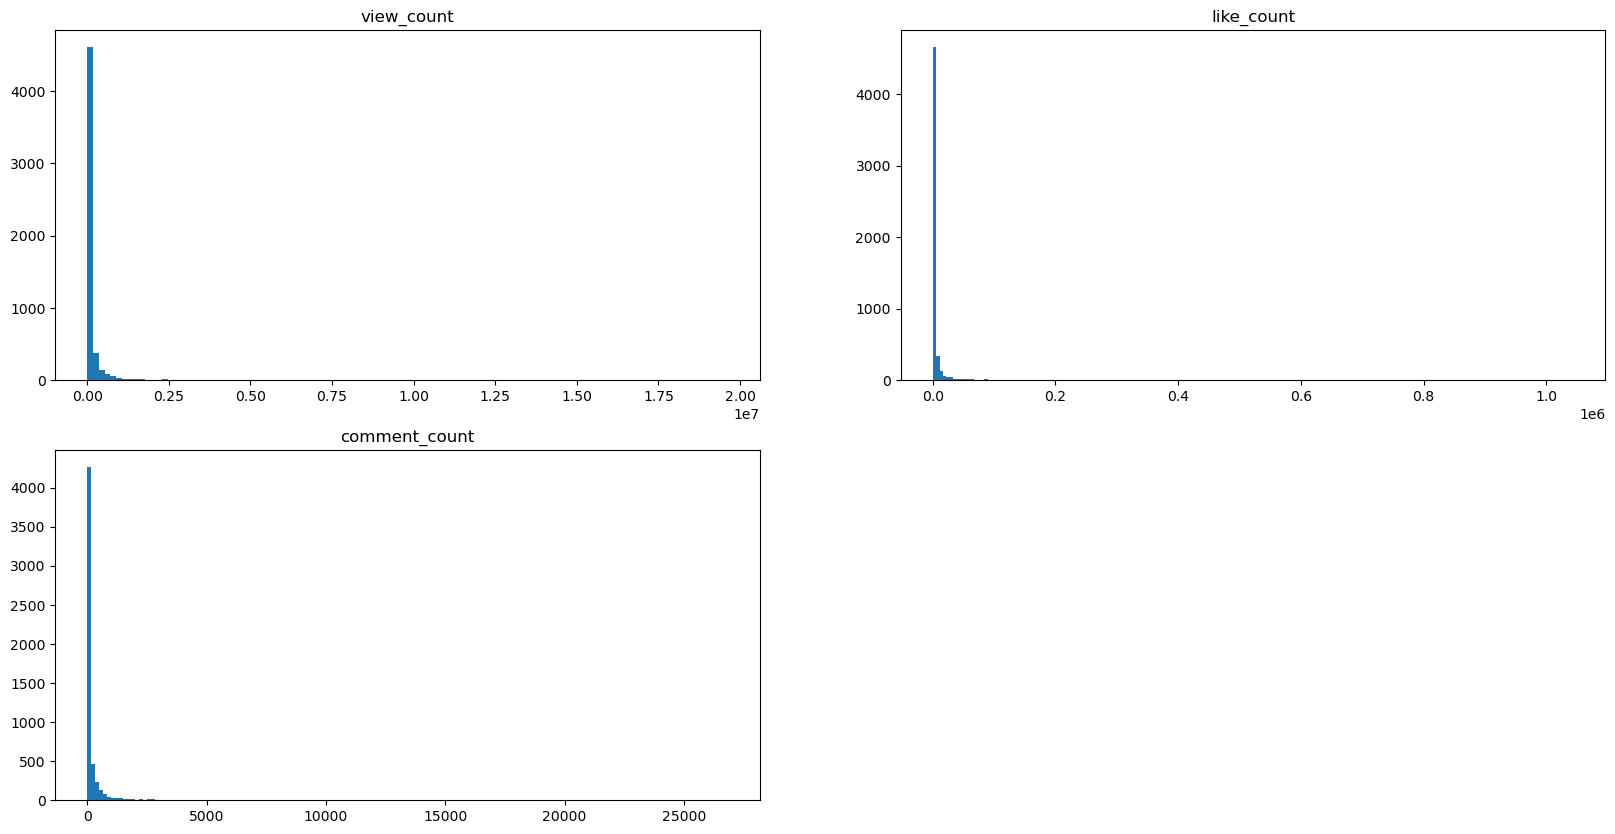

In [21]:
fig = plt.figure(figsize = (20, 10))
for i, col in enumerate(num_col_info_df_videos.columns):
    ax = fig.add_subplot(2, 2, i + 1)
    ax.hist(df_videos[col], bins = 'scott')
    ax.set_title(col)

In [22]:
num_col_info_df_comments = df_comments.select_dtypes(include = num_types)

num_col_info_df_comments = num_col_info_df_comments.agg([num_missing_ratio, 'min', num_lower_quartile, num_median, num_upper_quartile, 'max'])
num_col_info_df_comments

,Type,total_reply,like_count
num_missing_ratio,0.0,0.0,0.0
min,1.0,0.0,0.0
num_lower_quartile,1.0,0.0,0.0
num_median,1.0,0.0,0.0
num_upper_quartile,1.0,0.0,1.0
max,2.0,457.0,65952.0


### Distribution of Values for Non-numeric Columns

In [23]:
def missing_ratio(column):
    return (column.isnull().sum() / len(column) * 100).round(1)

def cat_num_values(column):
    if type(column[0] == 'list'):
        column = column.explode()
    return column.nunique()

def cat_value_ratios(column):
    if type(column[0] == 'list'):
        column = column.explode()
    return column.value_counts(normalize = True).sort_values(axis = 0).to_dict()

In [24]:
cat_cols = ['definition', 'tags', 'default_audio_language', 'madeforkid']
cat_col_info_df_videos = df_videos[cat_cols]

cat_col_info_df_videos = cat_col_info_df_videos.agg([missing_ratio, cat_num_values, cat_value_ratios])
cat_col_info_df_videos

,definition,tags,default_audio_language,madeforkid
missing_ratio,0.0,13.2,6.5,0.0
cat_num_values,2,24347,5,2
cat_value_ratios,"{'sd': 0.023086711506998727, 'hd': 0.976913288...",{'Scientists invent youth cocktail': 1.4208178...,"{'en-GB': 0.00038887808671981335, 'hi': 0.0017...","{True: 0.0021814215597164154, False: 0.9978185..."


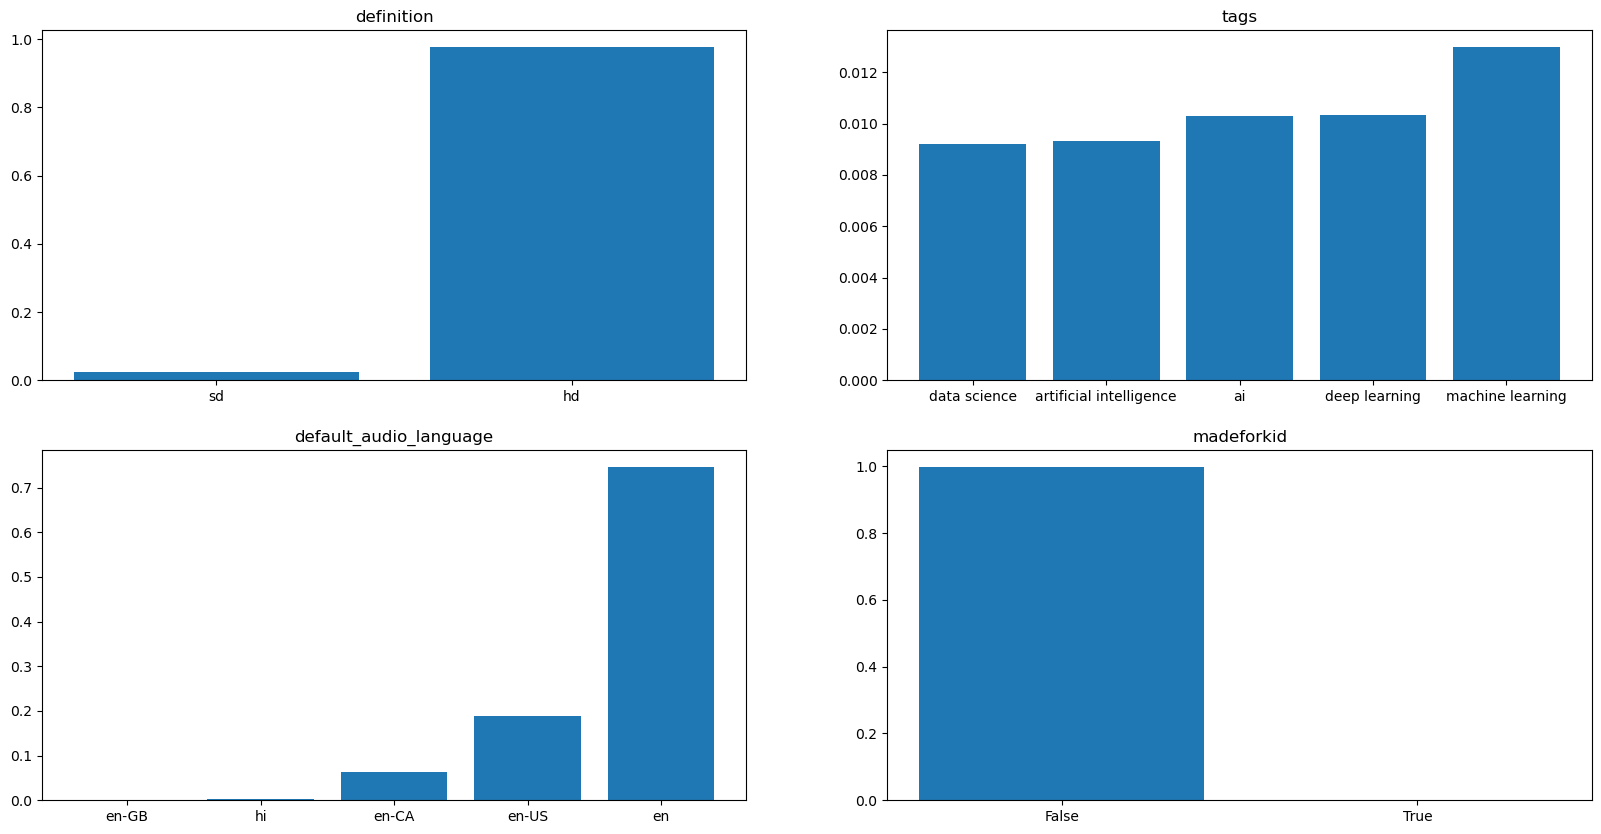

In [25]:
fig = plt.figure(figsize = (20, 10))
for i, col in enumerate(cat_col_info_df_videos.columns):
    ax = fig.add_subplot(2, 2, i + 1)
    n_top = 0
    if col == 'madeforkid':
        ax.set_xticks([0, 1])
        ax.set_xticklabels(['False', 'True'])
    if col == 'tags':
        n_top = 5
    ax.bar(*zip(*list(cat_col_info_df_videos[col]['cat_value_ratios'].items())[-n_top:]))
    ax.set_title(col)

In [26]:
cat_cols = ['author', 'Type']
cat_col_info_df_comments = df_comments[cat_cols]

cat_col_info_df_comments = cat_col_info_df_comments.agg([missing_ratio, cat_num_values, cat_value_ratios])
cat_col_info_df_comments

,author,Type
missing_ratio,0.0,0.0
cat_num_values,94756,2
cat_value_ratios,"{'@mastershill4997': 6.948835722574682e-06, '@...","{2.0: 0.23335788537439547, 1.0: 0.766642114625..."


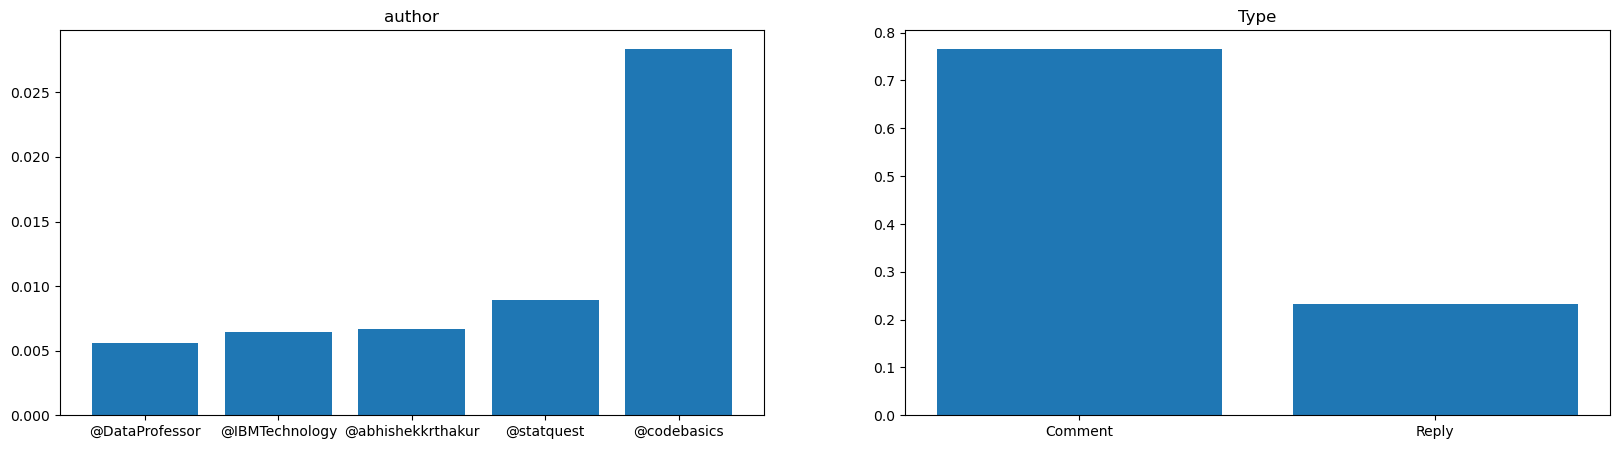

In [27]:
fig = plt.figure(figsize = (20, 5))
for i, col in enumerate(cat_col_info_df_comments.columns):
    ax = fig.add_subplot(1, 2, i + 1)
    n_top = 0
    if col == 'author':
        n_top = 5
    if col == 'Type':
        ax.set_xticks([1, 2])
        ax.set_xticklabels(['Comment', 'Reply'])
    ax.bar(*zip(*list(cat_col_info_df_comments[col]['cat_value_ratios'].items())[-n_top:]))
    ax.set_title(col)

### Save the processed data

In [28]:
processed_data_path = '../data/processed/'

df_videos.to_csv(processed_data_path + 'df_videos_processed.csv', index = False)
df_comments.to_csv(processed_data_path + 'df_comments_processed.csv', index = False)